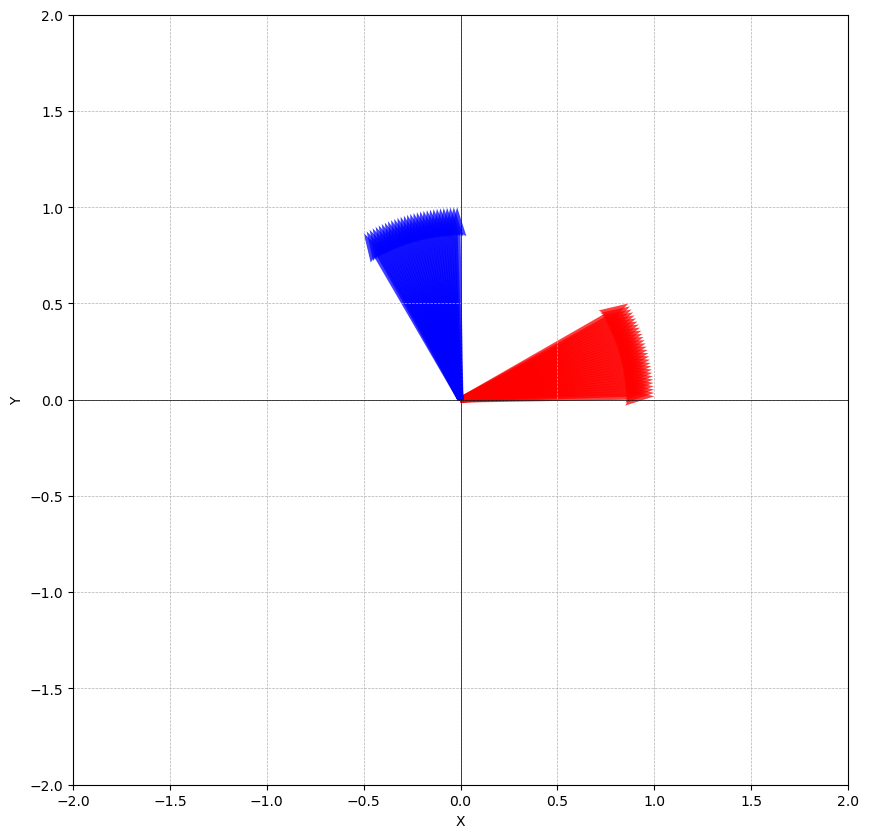

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os


magnitude = 1
angles_amount = 30


f = open("angles.txt", "w")
angles_degrees = range(1, angles_amount + 1)

vectors = []
drags = []
lifts = []

for angle_degrees in angles_degrees:
    angle_radians = np.radians(angle_degrees)
    
    x = magnitude * np.cos(angle_radians)
    y = magnitude * np.sin(angle_radians)
    
    vectors.append((x, y))
    drags.append((x,y))
    lifts.append((-y,x))

    row = "(" + str(x) + " "+  str(y) + " 0);\t(" + str(-y) + " " + str(x) + " 0);\n"
    f.write(row)
    
f.close()


origin = np.zeros((2, len(vectors)))

plt.figure(figsize=(10, 10))
plt.quiver(*origin, [v[0] for v in vectors], [v[1] for v in vectors],
           angles='xy', scale_units='xy', scale=1, color='r', alpha=0.75)


plt.quiver(*origin, [v[0] for v in lifts], [v[1] for v in lifts],
           angles='xy', scale_units='xy', scale=1, color='b', alpha=0.75)


plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [2]:
all_test_folders = os.listdir("./AIRFOIL_TESTS/")
all_test_folders.remove(".DS_Store")
alltests_names = []

last_test_num = 0
last_test_index = 0
for i in range(0, len(all_test_folders), 1):
    test_name = all_test_folders[i].split('_')[0]
    test_num = test_name.replace("TESTS", "")
    test_num = int(test_num)

    if(test_num > last_test_num):
        last_test_num = test_num
        last_test_index = i



def parse_cl_cd(test_name_path = ""):

    last_lines = []
    if(test_name_path == ""):
        current_tests_fodler = "./AIRFOIL_TESTS/" + all_test_folders[last_test_index] + "/"
    
    curr_test_index = 0
    while(1):
        filename_path = current_tests_fodler + "TEST_CASE" + str(curr_test_index) + ".dat"
        curr_test_index +=1
        if(os.path.exists(filename_path)):

            with open(filename_path) as f:
                for line in f:
                    pass
                last_line = line

                last_line = last_line.replace(' ', '')
                last_line = last_line.replace('\t', ',')

                last_lines.append(last_line)
        else:
            break


    cl = []
    cd = []
    for i in range(0, len(last_lines), 1):
        last_line_str = last_lines[i].split(",")
        
        cl.append(eval(last_line_str[4]))
        cd.append(eval(last_line_str[1]))

    return cl, cd



cl, cd = parse_cl_cd()

angles = np.arange(1, 31)

fig = go.Figure()

fig.add_scatter(x=angles, y=cl, name='Cl' )
fig.add_scatter(x=angles, y=cd, name='Cd')
fig.update_layout(xaxis_title="Angle")


# LD = []
# for i in range(0, len(cl), 1):
#     LD.append(cl[i]/cd[i])

# fig.add_scatter(x=angles, y=LD, name='Cl' )

